In [141]:
# dependencies
import seaborn as sns
import pandas as pd
import os

In [142]:
# configs
data_path = r"runs/detect/exp3/labels"

In [143]:
# get xywh and true resolution x and y

def get_object_xywh(file_name: str) -> list[list[float]]:
    with open(file_name, encoding="utf-8", mode="r") as f:
        file_lines = f.readlines()
        return_list = []
        
        for line in file_lines:
            result = line.split(" ")
            return_list.append([float(num) for num in result[1:]])
            
        return return_list

def get_objects_xywh(directory: str) -> list[list[float]]:
    return_list = []
    
    for root, dirs, files in os.walk(directory):

        for file in files:
            return_list += get_object_xywh(f"{root}/{file}")
    
    return return_list

def get_object_center(xywh_list: list[list[float]]) -> list[tuple[float, float]]:
    return_list = []
    
    for xywh in xywh_list:
        x = xywh[0]
        y = xywh[1]
        w = xywh[2]
        h = xywh[3]
        
        center_x = x + w / 2
        center_y = y + h / 2
        
        return_list.append((center_x, center_y))
    
    return return_list


In [144]:
xywh = get_objects_xywh(data_path)
pd.DataFrame(xywh)

,0,1,2,3
0,0.835156,0.343750,0.060937,0.121759
1,0.231250,0.242824,0.047396,0.119907
2,0.835156,0.346528,0.060937,0.118056
3,0.231250,0.242593,0.047396,0.120370
4,0.454948,0.591204,0.085938,0.347222
...,...,...,...,...
738,0.618359,0.911111,0.180469,0.172222
739,0.835156,0.344676,0.062500,0.115278
740,0.231250,0.242824,0.047396,0.119907
741,0.845312,0.334491,0.054688,0.127315


In [145]:
center_data = pd.DataFrame(get_object_center(xywh), columns=["res-x", "res-y"])
center_data

,res-x,res-y
0,0.865625,0.404629
1,0.254948,0.302778
2,0.865625,0.405556
3,0.254948,0.302778
4,0.497917,0.764815
...,...,...
738,0.708593,0.997222
739,0.866406,0.402315
740,0.254948,0.302778
741,0.872656,0.398149


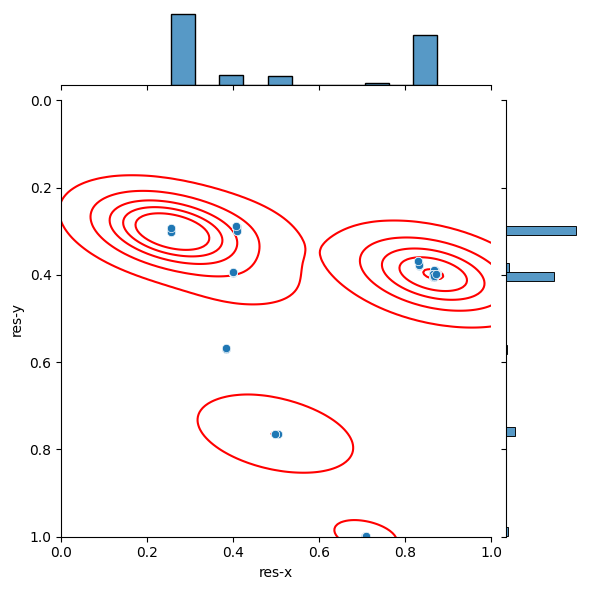

In [146]:
g = sns.jointplot(data=center_data, x="res-x", y="res-y", xlim=(0, 1), ylim=(1, 0))
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g